## Working with dates and times in pandas

In [2]:
import pandas as pd
ufo = pd.read_csv('7-8_uforeports.csv')
ufo.head()

City Colors Reported Shape Reported State             Time
0                Ithaca             NaN       TRIANGLE    NY   6/1/1930 22:00
1           Willingboro             NaN          OTHER    NJ  6/30/1930 20:00
2               Holyoke             NaN           OVAL    CO  2/15/1931 14:00
3               Abilene             NaN           DISK    KS   6/1/1931 13:00
4  New York Worlds Fair             NaN          LIGHT    NY  4/18/1933 19:00

In [3]:
ufo.dtypes

City               object
Colors Reported    object
Shape Reported     object
State              object
Time               object
dtype: object

In [5]:
ufo.Time.str.slice(-5, -3).astype(int).head() # Easily breakable approach

0    22
1    20
2    14
3    13
4    19
Name: Time, dtype: int64

### Convert the Time column to pandas special DateTime format

In [6]:
ufo['Time'] = pd.to_datetime(ufo.Time) # pandas automatically figured out the way the date/time is formatted
ufo.head()

City Colors Reported Shape Reported State  \
0                Ithaca             NaN       TRIANGLE    NY   
1           Willingboro             NaN          OTHER    NJ   
2               Holyoke             NaN           OVAL    CO   
3               Abilene             NaN           DISK    KS   
4  New York Worlds Fair             NaN          LIGHT    NY   

                 Time  
0 1930-06-01 22:00:00  
1 1930-06-30 20:00:00  
2 1931-02-15 14:00:00  
3 1931-06-01 13:00:00  
4 1933-04-18 19:00:00

In [7]:
ufo.dtypes

City                       object
Colors Reported            object
Shape Reported             object
State                      object
Time               datetime64[ns]
dtype: object

In [11]:
ufo.Time.dt.hour.head() # Pulls out the hour

0    22
1    20
2    14
3    13
4    19
Name: Time, dtype: int64

In [9]:
ufo.Time.dt.weekday_name.head() # Pulls out the day of the week

0     Sunday
1     Monday
2     Sunday
3     Monday
4    Tuesday
Name: Time, dtype: object

In [10]:
ufo.Time.dt.dayofyear.head() # Pulls out the day of the year

0    152
1    181
2     46
3    152
4    108
Name: Time, dtype: int64

In [14]:
ts = pd.to_datetime('1/1/1999')

In [16]:
ufo.loc[ufo.Time >= ts, :].head() # Show the times that are greater than or equal to the timestamp I created above

City Colors Reported Shape Reported State  \
12832          Loma Rica             NaN          LIGHT    CA   
12833            Bauxite             NaN            NaN    AR   
12834           Florence             NaN       CYLINDER    SC   
12835       Lake Henshaw             NaN          CIGAR    CA   
12836  Wilmington Island             NaN          LIGHT    GA   

                     Time  
12832 1999-01-01 02:30:00  
12833 1999-01-01 03:00:00  
12834 1999-01-01 14:00:00  
12835 1999-01-01 15:00:00  
12836 1999-01-01 17:15:00

In [17]:
ufo.Time.max() # Latest timestamp in the time series

Timestamp('2000-12-31 23:59:00')

In [18]:
ufo.Time.max() - ufo.Time.min() #Create a Timedelta object

Timedelta('25781 days 01:59:00')

In [20]:
%matplotlib inline 

In [21]:
ufo['Year'] = ufo.Time.dt.year

In [22]:
ufo.head()

City Colors Reported Shape Reported State  \
0                Ithaca             NaN       TRIANGLE    NY   
1           Willingboro             NaN          OTHER    NJ   
2               Holyoke             NaN           OVAL    CO   
3               Abilene             NaN           DISK    KS   
4  New York Worlds Fair             NaN          LIGHT    NY   

                 Time  Year  
0 1930-06-01 22:00:00  1930  
1 1930-06-30 20:00:00  1930  
2 1931-02-15 14:00:00  1931  
3 1931-06-01 13:00:00  1931  
4 1933-04-18 19:00:00  1933

In [25]:
ufo.Year.value_counts().head() # How many times does each year appear?

1999    2774
2000    2635
1998    1743
1995    1344
1997    1237
Name: Year, dtype: int64

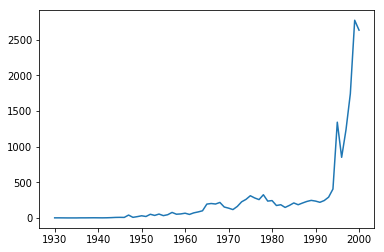

In [24]:
ufo.Year.value_counts().sort_index().plot()